In [2]:
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_csv('BeerWineLiquor.csv')

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [6]:
df.columns = ['ds', 'y']

In [7]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [8]:
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [10]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=24, freq='MS')

In [13]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [14]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [15]:
forecast = m.predict(future)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1134.612916,1473.669540,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1178.897816,1508.328974,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1437.747828,1754.080806,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1412.693648,1746.469934,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1673.186928,1998.959387,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5201.232291,5077.727381,5401.408138,5189.441285,5211.873182,39.473660,39.473660,39.473660,39.473660,39.473660,39.473660,0.0,0.0,0.0,5240.705951
344,2020-09-01,5217.295945,4931.222735,5255.120526,5204.618735,5228.843929,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,0.0,0.0,0.0,5083.568322
345,2020-10-01,5232.841416,5030.323012,5357.550370,5219.145435,5245.744338,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,0.0,0.0,0.0,5189.273100
346,2020-11-01,5248.905070,5174.616622,5492.688385,5233.915769,5262.603470,87.524399,87.524399,87.524399,87.524399,87.524399,87.524399,0.0,0.0,0.0,5336.429469


In [17]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4456.662652,4805.827554,4629.426372
337,2020-02-01,4509.107245,4833.467007,4680.226146
338,2020-03-01,4783.226115,5104.060747,4943.299086
339,2020-04-01,4787.100741,5095.927116,4941.866893
340,2020-05-01,5034.943210,5357.403596,5198.382732
341,2020-06-01,5003.616117,5338.822631,5178.976562
342,2020-07-01,5139.962792,5464.255899,5311.178497
343,2020-08-01,5077.727381,5401.408138,5240.705951
344,2020-09-01,4931.222735,5255.120526,5083.568322
345,2020-10-01,5030.323012,5357.550370,5189.273100


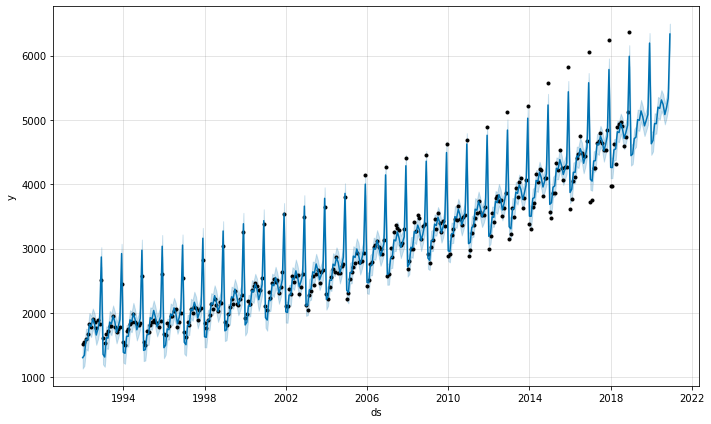

In [26]:
m.plot(forecast);

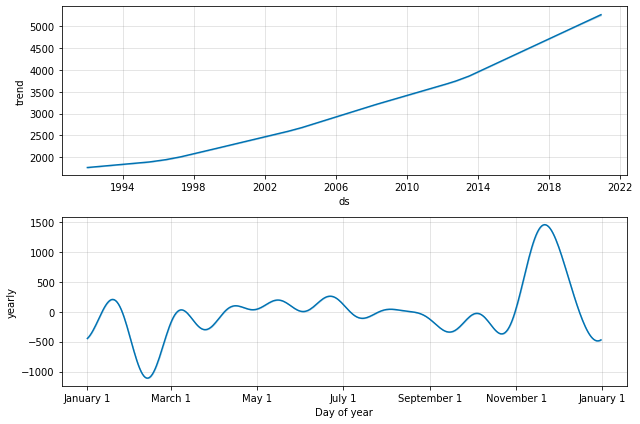

In [28]:
m.plot_components(forecast);